# SMARTTRACK AI DEEP LEARNING ASSESSMENT


# Artificial Neural Network for Performance Prediction and Fault Detection in a Photovoltaic System

## NOTE : This was just an experiment with simple ANN. 
## Main Code Notebook is "Autoencoder for Anomaly Detection and Power Output Prediction.ipynb"

**Name: HARISH WATHORE
<br>
Roll Number: 20101017
<br>
Department of Aerospace Engineering
<br>
Indian Institute of Technology Kanpur
<br>**


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
data = pd.read_csv('PV_dataset_4.csv')

# Extract input features (Tm, Ta, Gir) and output target (Pac)
features = data[['Tm', 'Ta', 'Gir']]
target = data['Pac']

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [4]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='swish', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='swish'),
    tf.keras.layers.Dense(1)  # Output layer, no activation for regression
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
tf.keras.backend.clear_session()


In [8]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1021/1021 [==============================] - 3s 2ms/step - loss: 19097.5293 - val_loss: 2081.1582
Epoch 2/100
1021/1021 [==============================] - 2s 2ms/step - loss: 1595.7460 - val_loss: 1301.8859
Epoch 3/100
1021/1021 [==============================] - 2s 2ms/step - loss: 1047.1263 - val_loss: 849.8340
Epoch 4/100
1021/1021 [==============================] - 2s 2ms/step - loss: 679.9797 - val_loss: 530.7708
Epoch 5/100
1021/1021 [==============================] - 2s 2ms/step - loss: 441.3285 - val_loss: 361.3491
Epoch 6/100
1021/1021 [==============================] - 2s 2ms/step - loss: 270.6908 - val_loss: 158.5048
Epoch 7/100
1021/1021 [==============================] - 2s 2ms/step - loss: 112.9007 - val_loss: 73.9960
Epoch 8/100
1021/1021 [==============================] - 2s 2ms/step - loss: 58.1654 - val_loss: 41.4815
Epoch 9/100
1021/1021 [==============================] - 2s 2ms/step - loss: 34.3952 - val_loss: 24.4308
Epoch 10/100
1021/1021 [============

In [9]:
# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)


320/320 [==============================] - 1s 1ms/step


In [10]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 0.8346553911431945


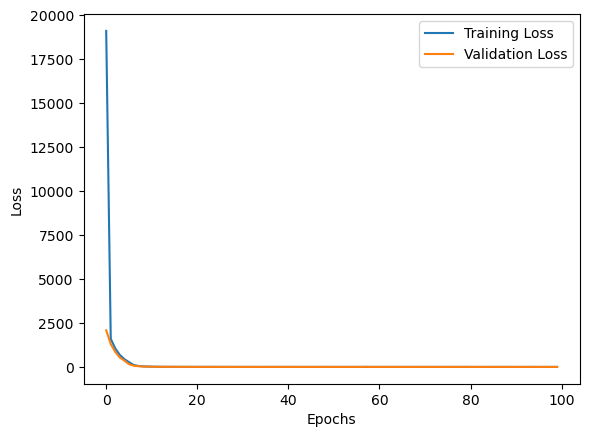

In [11]:
import matplotlib.pyplot as plt
# Plot the training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Predictions on the test set
predictions = model.predict(X_test_scaled)

# Save true values, predictions, and features to a CSV file
result_df = pd.DataFrame({'True_Pac': y_test, 'Predicted_Pac': predictions.flatten()})
result_df.to_csv('predictions.csv', index=False)

320/320 [==============================] - 0s 1ms/step


In [14]:
result_df = pd.DataFrame({
    'True_Pac': y_test,
    'Predicted_Pac': predictions.flatten(),
    'Tm': X_test['Tm'],   # Add more columns as needed
    'Ta': X_test['Ta'],
    'Gir': X_test['Gir']
})

In [16]:
# Sort the DataFrame based on ascending values of 'Ta' and 'Gir'
result_df = result_df.sort_values(by=['Ta', 'Gir'])

# Save the sorted DataFrame to a CSV file
result_df.to_csv('predictions_with_features_sorted_3.csv', index=False)

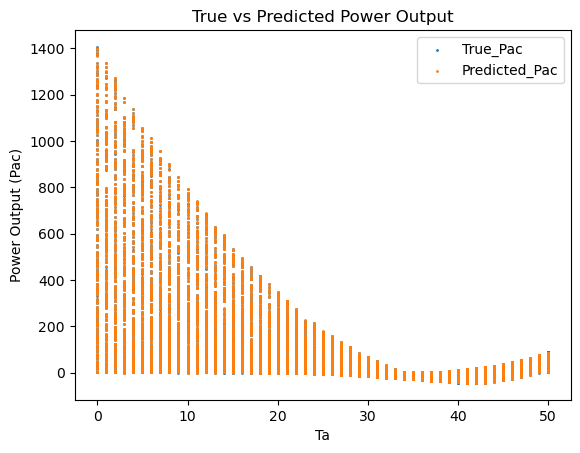

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the predictions with features from the CSV file
import_df = pd.read_csv('predictions_with_features_sorted_3.csv')

# Plot 'Ta' vs 'True_Pac' and 'Predicted_Pac' with smaller points
plt.scatter(import_df['Ta'], import_df['True_Pac'], label='True_Pac', s=1)  # Adjust 's' for size
plt.scatter(import_df['Ta'], import_df['Predicted_Pac'], label='Predicted_Pac', s=1)  # Adjust 's' for size
plt.xlabel('Ta')
plt.ylabel('Power Output (Pac)')
plt.title('True vs Predicted Power Output')
plt.legend()
plt.show()

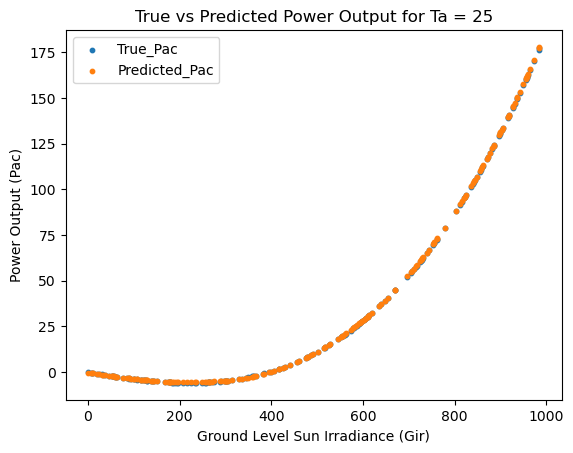

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the predictions with features from the CSV file
import_df = pd.read_csv('predictions_with_features_sorted_3.csv')

# Filter the DataFrame for Ta = 25
selected_ta_df = import_df[import_df['Ta'] == 25]

# Plot 'Gir' vs 'True_Pac' and 'Predicted_Pac' for Ta = 25
plt.scatter(selected_ta_df['Gir'], selected_ta_df['True_Pac'], label='True_Pac', s=10)
plt.scatter(selected_ta_df['Gir'], selected_ta_df['Predicted_Pac'], label='Predicted_Pac', s=10)
plt.xlabel('Ground Level Sun Irradiance (Gir)')
plt.ylabel('Power Output (Pac)')
plt.title('True vs Predicted Power Output for Ta = 25')
plt.legend()
plt.show()
